## MTNOY STOCK PRICE ANALYSIS

In [9]:
import requests
import pandas as pd
from config import settings
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### DATA EXPLORATION & WRANGLING

In [6]:
#loading the dataset

df = pd.read_csv("mtnoy_dataset.csv").set_index("date")
df.index = pd.to_datetime(df.index)
df= df.sort_index(ascending=True)
df.head()

,open,high,low,close,volume
date,,,,,
2007-07-13,14.80,14.80,14.7,14.80,2989.0
2007-07-16,14.95,14.95,14.6,14.95,3134.0
2007-07-17,14.58,14.80,14.5,14.58,29498.0
2007-07-18,14.70,14.70,14.7,14.70,1671.0
2007-07-19,15.05,15.05,15.0,15.05,9036.0


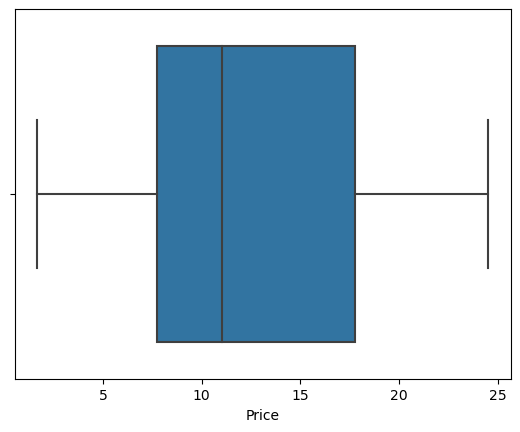

In [12]:
sns.boxplot(x=df["close"])
plt.xlabel("Price");

In [4]:
# creating the returns columns

df["returns"] = df["close"].pct_change() * 100
df_mtnoy_return = df["returns"].dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4144 entries, 2007-07-13 to 2023-12-27
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     4144 non-null   float64
 1   high     4144 non-null   float64
 2   low      4144 non-null   float64
 3   close    4144 non-null   float64
 4   volume   4144 non-null   float64
 5   returns  4143 non-null   float64
dtypes: float64(6)
memory usage: 226.6 KB


In [6]:
df_mtnoy_return.head()

date
2007-07-16    1.013514
2007-07-17   -2.474916
2007-07-18    0.823045
2007-07-19    2.380952
2007-07-20    0.996678
Name: returns, dtype: float64

In [7]:
# DAily and year volatility

mtnoy_daily_volatility = df_mtnoy_return.std()
mtnoy_annual_volatility = mtnoy_daily_volatility*np.sqrt(252)

print("Daily volatility",mtnoy_daily_volatility)
print("Annual volatility",mtnoy_annual_volatility)

Daily volatility 3.050402599040862
Annual volatility 48.42364005412317


In [8]:
# mtnoy_50days_volatility

mtnoy_50days_volatility = df_mtnoy_return.rolling(window=50).std().dropna()
mtnoy_50days_volatility

date
2007-09-24    3.358822
2007-09-25    3.359852
2007-09-26    3.341729
2007-09-27    3.363776
2007-09-28    3.350762
                ...   
2023-12-20    2.749867
2023-12-21    2.752651
2023-12-22    2.710248
2023-12-26    2.703339
2023-12-27    2.702969
Name: returns, Length: 4094, dtype: float64